# Image Histogram

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, data, img_as_ubyte
from skimage.exposure import equalize_hist, match_histograms

## 1. Histogram

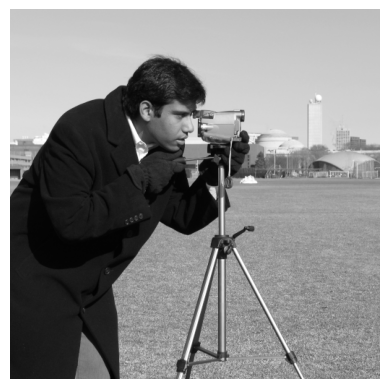

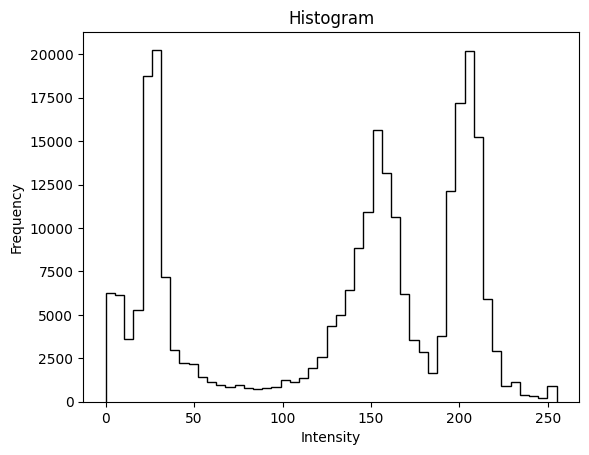

In [13]:
img = data.camera()
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

v = np.concatenate(img)
bins = np.linspace(0, 255, 50)
plt.hist(v, bins, color='k', histtype='step')
plt.title("Histogram")
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.show()

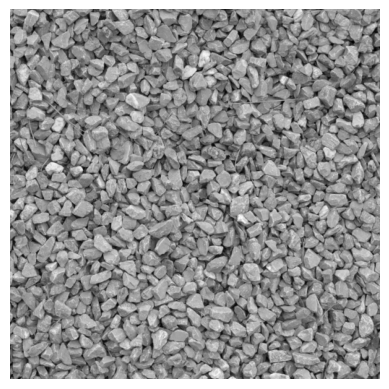

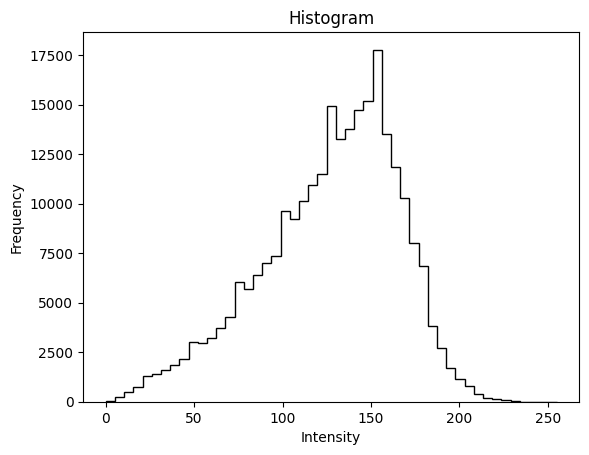

In [14]:
img = data.gravel()
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

v = np.concatenate(img)
bins = np.linspace(0, 255, 50)
plt.hist(v, bins, color='k', histtype='step')
plt.title("Histogram")
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.show()

## 2. Contrast Stretch

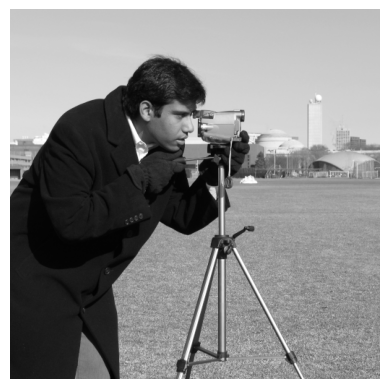

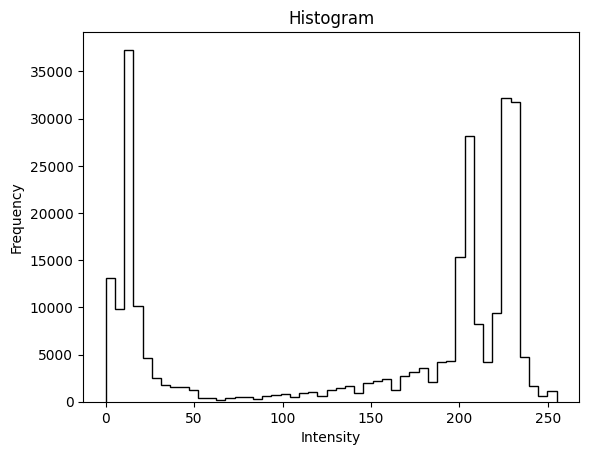

In [20]:
img = data.camera()
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

r1 = 100
s1 = 50
r2 = 150
s2 = 200
imf = img.copy()
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        v = img[i][j]
        #if(0 <= v and v <= r1):
        if(v >= 0 and v <= r1):
            imf[i][j] = (s1/r1 * v)
        elif(r1 < v and v <= r2):
            imf[i][j] = ((s2 - s1)/(r2 - r1)) * (v - r1) + s1
        elif(r2 < v and v <= 255):
            imf[i][j] = ((255 - s2)/(255 - r2)) * (v - r2) + s2
v = np.concatenate(imf)
bins = np.linspace(0, 255, 50)
plt.hist(v, bins, color='k', histtype='step')
plt.title("Histogram")
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.show()



## 3. Histogram Equalization

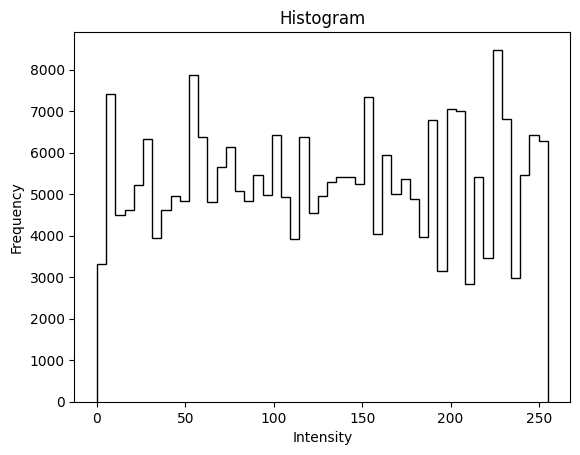

In [21]:
img = data.camera()
imeq = equalize_hist(img)
imeq = img_as_ubyte(imeq)
v = np.concatenate(imeq)
bins = np.linspace(0, 255, 50)
plt.hist(v, bins, color='k', histtype='step')
plt.title("Histogram")
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.show()


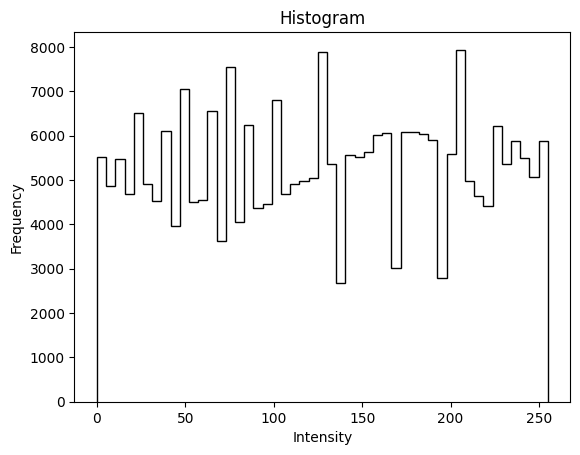

In [22]:
img = data.gravel()
imeq = equalize_hist(img)
imeq = img_as_ubyte(imeq)
v = np.concatenate(imeq)
bins = np.linspace(0, 255, 50)
plt.hist(v, bins, color='k', histtype='step')
plt.title("Histogram")
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.show()

## 4. Histogram matching

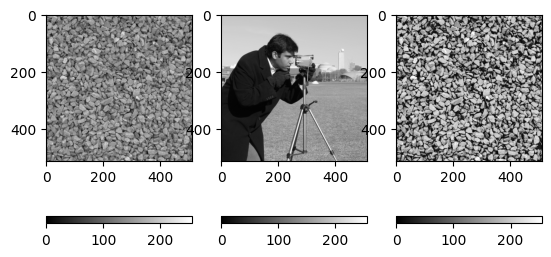

In [25]:
img = data.gravel()
imr = data.camera()
imm = match_histograms(img, imr)
fig = plt.figure()
ax = fig.add_subplot(1, 3, 1)
p = plt.imshow(img, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 3, 2)
p = plt.imshow(imr, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 3, 3)
p = plt.imshow(imm, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)